Playing around with the data, plotting and filtering data to test how the data looks like to train out neural networks

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import os
import math
from scipy import signal
import scipy
from scipy.fft import fft, fftfreq


In [13]:
#Given a list, find the index less than num
def findIndexBefore(list1, num):
    for i in range(len(list1)):
        if (list1[i]) > num:
            return i - 1
    return len(list1) - 1

In [14]:
day = "2024-07-02"
dir = "/Users/henrywang/Documents/PPGBP/PPGCaffeineDetection/CaffeineReadings/" + day



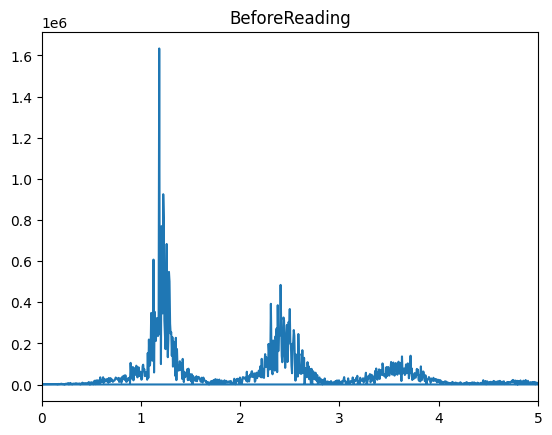

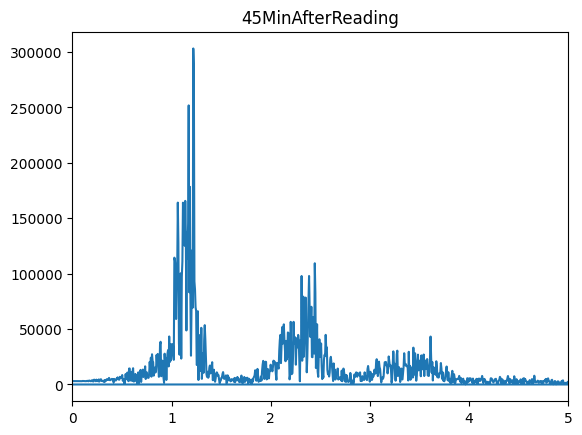

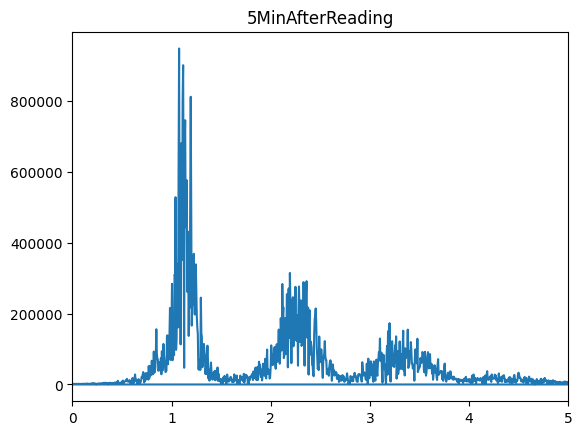

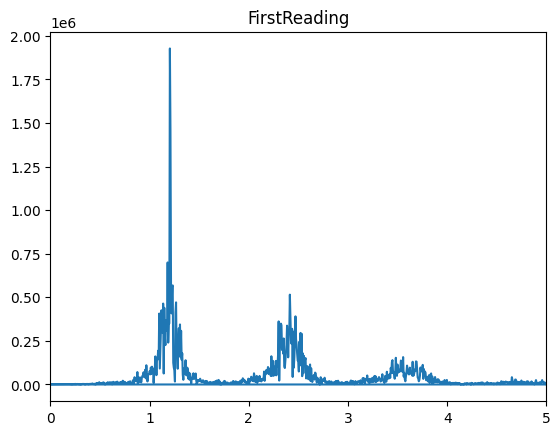

In [15]:
#Fourier transformation of data
count = 1
for file in os.listdir(dir):
    name = file[:-4]
    time, y1, y2 = np.loadtxt(dir + "/" + file, delimiter = ",", unpack=True)
    y1 = -y1
    y2 = -y2
    y2 = y2[1000:]

    sos = signal.butter(2, [0.7, 4], fs=100, btype='band', output='sos')
    y2 = (signal.sosfiltfilt(sos, y2))
    y2 = np.array(y2)
    yf = fft(y2)
    xf = fftfreq(len(y2), 1 / 100)

    plt.xlim(0, 5)
    plt.title(name)
    plt.plot(xf, np.abs(yf))
    count+= 1
    plt.show()



Text(0.5, 1.0, 'Right Before Consuming Caffeine')

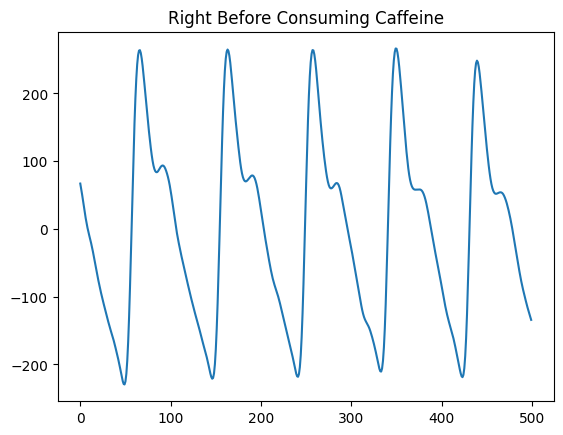

In [20]:
#Plotting data after butterworth filter

time, y1, y2 = np.loadtxt('/Users/henrywang/Documents/PPGBP/PPGCaffeineDetection/CaffeineReadings/2024-06-28/BeforeReading.txt', delimiter = ",", unpack=True)
y1 = -y1
y2 = -y2
sos = signal.butter(2, [0.5, 8], fs=100, btype='band', output='sos')
y2 = (signal.sosfiltfilt(sos, y2))
y2 = y2[500:1000]

time = time[500:1000]
plt.plot(y2)
plt.title("Right Before Consuming Caffeine")

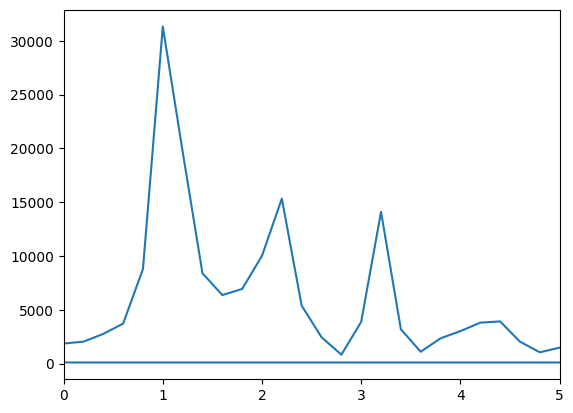

In [22]:
yf = fft(y2)
xf = fftfreq(len(y2), 1 / 100)

plt.xlim(0, 5)
plt.plot(xf, np.abs(yf))